In [86]:
from string import ascii_letters
import numpy as np 
import pandas as pd 
from scipy import stats # scientific python 
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
df = pd.read_csv('tenis_player_5.csv')
df.head()

,Rank,Country,Name,Last name,Full Name,Matches Played,Matches Won,Match Time,Aces,Double Faults,1st Serve Won %,2nd Serve Won %,Points per Match,Break Points Saved %
0,1,USA,Jimmy,Connors,Jimmy Connors,1560,1275,1:54,140,3814,62.83%,50.07%,0.00,57.84%
1,2,SUI,Roger,Federer,Roger Federer,1520,1245,1:39,11452,2756,77.39%,57.03%,161.45,67.29%
2,3,USA,Ivan,Lendl,Ivan Lendl,1311,1069,1:45,1701,656,75.96%,52.18%,160.91,62.50%
3,4,ESP,Rafael,Nadal,Rafael Nadal,1234,1026,1:54,3761,1968,72.17%,57.37%,150.59,66.36%
4,7,SRB,Novak,Djokovic,Novak Djokovic,1175,978,1:51,6225,2611,73.70%,55.43%,158.70,65.45%


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  88 non-null     int64  
 1   Country               88 non-null     object 
 2   Name                  88 non-null     object 
 3   Last name             88 non-null     object 
 4   Full Name             88 non-null     object 
 5   Matches Played        88 non-null     int64  
 6   Matches Won           88 non-null     int64  
 7   Match Time            88 non-null     object 
 8   Aces                  88 non-null     int64  
 9   Double Faults         88 non-null     int64  
 10  1st Serve Won %       88 non-null     object 
 11  2nd Serve Won %       88 non-null     object 
 12  Points per Match      88 non-null     float64
 13  Break Points Saved %  88 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 9.8+ KB


In [89]:
df.dtypes

Rank                      int64
Country                  object
Name                     object
Last name                object
Full Name                object
Matches Played            int64
Matches Won               int64
Match Time               object
Aces                      int64
Double Faults             int64
1st Serve Won %          object
2nd Serve Won %          object
Points per Match        float64
Break Points Saved %     object
dtype: object

In [90]:
df['Match Time'] = pd.to_datetime(df['Match Time'])

In [91]:
df["Matches Won"]=pd.to_numeric(df["Matches Won"])

In [92]:
df["Double Faults"]=pd.to_numeric(df["Double Faults"])

In [93]:
df['1st Serve Won %'] = df['1st Serve Won %'].replace({'%': ''},regex=True)
df['1st Serve Won %'] = pd.to_numeric(df['1st Serve Won %'])

In [94]:
df['2nd Serve Won %'] = df['2nd Serve Won %'].replace({'%': ''},regex=True)
df['2nd Serve Won %'] = pd.to_numeric(df['2nd Serve Won %'])

In [95]:
df['Break Points Saved %'] = df['Break Points Saved %'].replace({'%': ''},regex=True)
df['Break Points Saved %'] = pd.to_numeric(df['Break Points Saved %'])

In [96]:
df.dtypes

Rank                             int64
Country                         object
Name                            object
Last name                       object
Full Name                       object
Matches Played                   int64
Matches Won                      int64
Match Time              datetime64[ns]
Aces                             int64
Double Faults                    int64
1st Serve Won %                float64
2nd Serve Won %                float64
Points per Match               float64
Break Points Saved %           float64
dtype: object

In [97]:
df['1st Serve Won %']=df['1st Serve Won %']/100
df['2nd Serve Won %']=df['2nd Serve Won %']/100
df['Break Points Saved %']=df['Break Points Saved %']/100

In [98]:
df

,Rank,Country,Name,Last name,Full Name,Matches Played,Matches Won,Match Time,Aces,Double Faults,1st Serve Won %,2nd Serve Won %,Points per Match,Break Points Saved %
0,1,USA,Jimmy,Connors,Jimmy Connors,1560,1275,2021-09-24 01:54:00,140,3814,0.6283,0.5007,0.00,0.5784
1,2,SUI,Roger,Federer,Roger Federer,1520,1245,2021-09-24 01:39:00,11452,2756,0.7739,0.5703,161.45,0.6729
2,3,USA,Ivan,Lendl,Ivan Lendl,1311,1069,2021-09-24 01:45:00,1701,656,0.7596,0.5218,160.91,0.6250
3,4,ESP,Rafael,Nadal,Rafael Nadal,1234,1026,2021-09-24 01:54:00,3761,1968,0.7217,0.5737,150.59,0.6636
4,7,SRB,Novak,Djokovic,Novak Djokovic,1175,978,2021-09-24 01:51:00,6225,2611,0.7370,0.5543,158.70,0.6545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,261,SWE,Magnus,Norman,Magnus Norman,421,244,2021-09-24 01:40:00,2510,1033,0.7184,0.5000,156.75,0.6154
84,262,UKR,Alexandr,Dolgopolov,Alexandr Dolgopolov,420,219,2021-09-24 01:30:00,3147,1135,0.7456,0.5128,154.64,0.5992
85,273,FRA,Michael,Llodra,Michael Llodra,408,187,2021-09-24 01:34:00,3091,1317,0.7348,0.5109,152.82,0.6206
86,285,USA,Jan,Gambill,Jan Gambill,397,201,2021-09-24 01:37:00,4194,1324,0.7657,0.4971,155.92,0.6362


In [99]:
df.corr()

,Rank,Matches Played,Matches Won,Aces,Double Faults,1st Serve Won %,2nd Serve Won %,Points per Match,Break Points Saved %
Rank,1.000000,-0.888513,-0.807324,-0.419490,-0.608376,-0.123336,-0.403929,0.076839,-0.274527
Matches Played,-0.888513,1.000000,0.970461,0.288809,0.570102,-0.016780,0.425055,-0.332512,0.203461
Matches Won,-0.807324,0.970461,1.000000,0.220703,0.478245,-0.010708,0.478824,-0.358342,0.220673
Aces,-0.419490,0.288809,0.220703,1.000000,0.469167,0.740374,0.397441,0.295452,0.752002
Double Faults,-0.608376,0.570102,0.478245,0.469167,1.000000,0.140669,-0.011693,-0.213505,0.181391
1st Serve Won %,-0.123336,-0.016780,-0.010708,0.740374,0.140669,1.000000,0.196328,0.487382,0.773892
2nd Serve Won %,-0.403929,0.425055,0.478824,0.397441,-0.011693,0.196328,1.000000,0.091591,0.530219
Points per Match,0.076839,-0.332512,-0.358342,0.295452,-0.213505,0.487382,0.091591,1.000000,0.333586
Break Points Saved %,-0.274527,0.203461,0.220673,0.752002,0.181391,0.773892,0.530219,0.333586,1.000000


<AxesSubplot:>

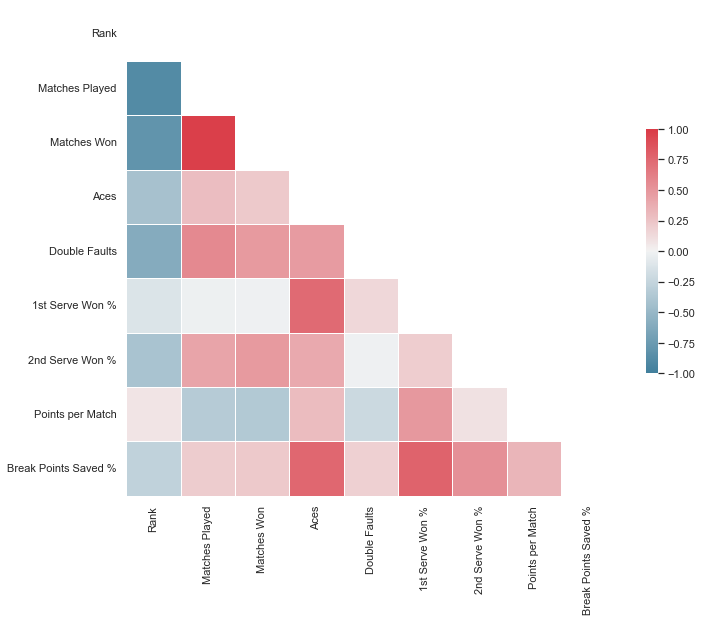

In [100]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr=df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
paises=df.Country.value_counts()
paises

USA    14
FRA    10
ESP     6
SWE     5
GER     5
CRO     4
NED     4
GBR     3
CHI     3
ARG     3
AUS     3
RUS     3
CZE     3
RSA     2
AUT     2
SUI     2
SRB     2
MAR     1
LUX     1
URU     1
BLR     1
BEL     1
UZB     1
JPN     1
CAN     1
BRA     1
DEN     1
BUL     1
CYP     1
SVK     1
UKR     1
Name: Country, dtype: int64

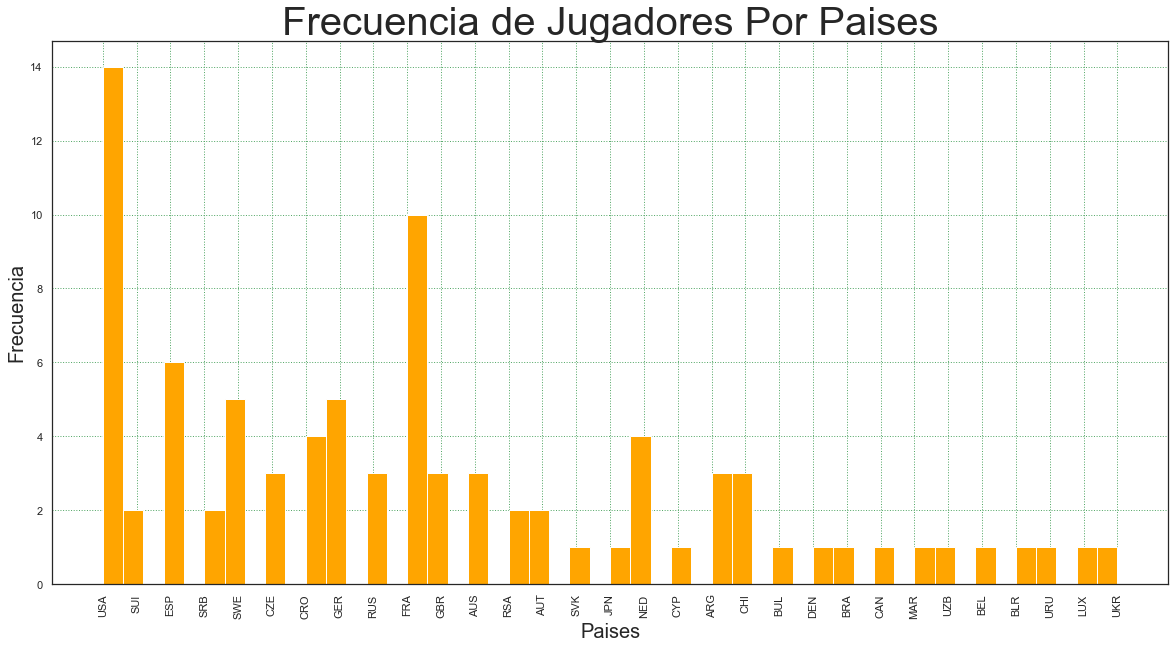

In [102]:

hist_paises=df['Country']
plt.figure(figsize=(20,10))
plt.axes().set_facecolor('white')
plt.hist(x=hist_paises,color=['orange'], rwidth=1,bins=50)
plt.title('Frecuencia de Jugadores Por Paises',fontsize=40)
plt.xlabel('Paises',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)
plt.xticks(rotation=90)
plt.grid(color='g', linestyle='dotted', linewidth=1)

plt.show() 

In [103]:
ganados_jugados=df.groupby(['Country'],as_index=False)[['Matches Played','Matches Won']].sum()
ganados_jugados

,Country,Matches Played,Matches Won
0,ARG,1455,900
1,AUS,1944,1287
2,AUT,1154,655
3,BEL,488,291
4,BLR,486,244
5,BRA,553,358
6,BUL,562,336
7,CAN,545,372
8,CHI,1651,1019
9,CRO,3211,1936


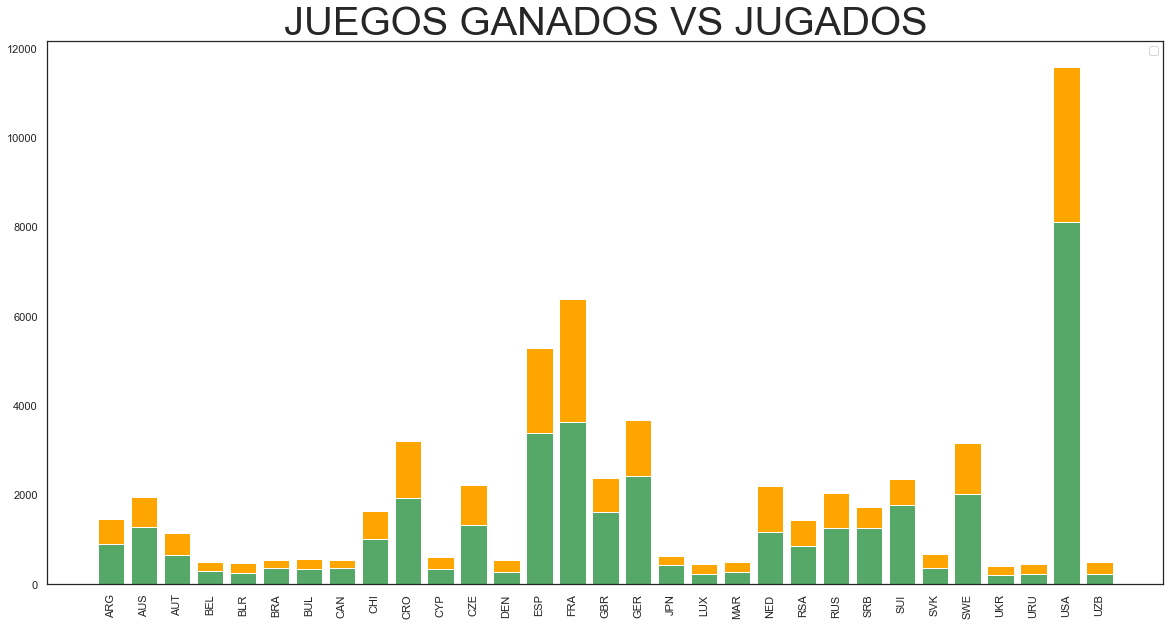

In [104]:
y1=ganados_jugados['Matches Won']
y2=ganados_jugados['Matches Played']
X = ganados_jugados['Country']
plt.figure(figsize=(20,10))
plt.title('JUEGOS GANADOS VS JUGADOS',fontsize=40)
plt.legend(['Matches Won','Matches Played'])
plt.bar(X , y2, color = "orange", width = 0.8)
plt.bar(X , y1, color = "g", width = 0.8)
plt.xticks(rotation=90);

In [105]:
ganados_jugados['Proporcion_ganados_jugados']=ganados_jugados['Matches Won']/ganados_jugados['Matches Played']*100
ganados_jugados

,Country,Matches Played,Matches Won,Proporcion_ganados_jugados
0,ARG,1455,900,61.855670
1,AUS,1944,1287,66.203704
2,AUT,1154,655,56.759099
3,BEL,488,291,59.631148
4,BLR,486,244,50.205761
5,BRA,553,358,64.737794
6,BUL,562,336,59.786477
7,CAN,545,372,68.256881
8,CHI,1651,1019,61.720170
9,CRO,3211,1936,60.292744


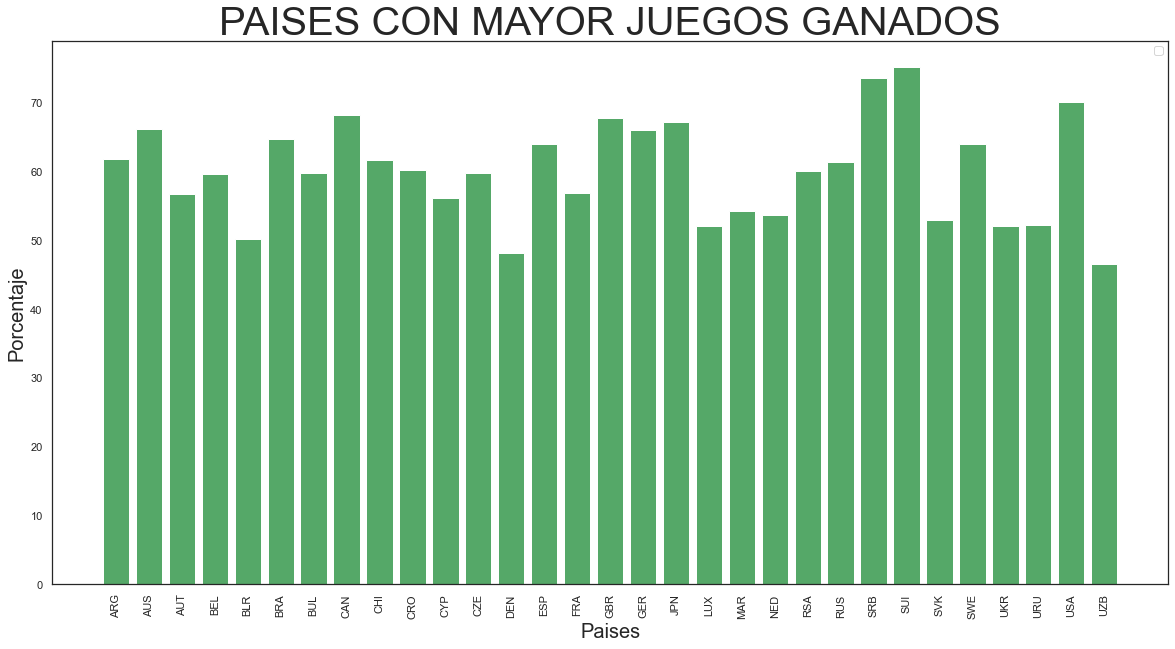

In [106]:
y1=ganados_jugados['Proporcion_ganados_jugados']
X = ganados_jugados['Country']
plt.figure(figsize=(20,10))
plt.xlabel('Paises',fontsize=20)
plt.ylabel('Porcentaje',fontsize=20)
plt.title('PAISES CON MAYOR JUEGOS GANADOS',fontsize=40)
plt.legend(['Matches Won'])
plt.bar(X , y1, color = "g", width = 0.8)
plt.xticks(rotation=90);

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Rank                  88 non-null     int64         
 1   Country               88 non-null     object        
 2   Name                  88 non-null     object        
 3   Last name             88 non-null     object        
 4   Full Name             88 non-null     object        
 5   Matches Played        88 non-null     int64         
 6   Matches Won           88 non-null     int64         
 7   Match Time            88 non-null     datetime64[ns]
 8   Aces                  88 non-null     int64         
 9   Double Faults         88 non-null     int64         
 10  1st Serve Won %       88 non-null     float64       
 11  2nd Serve Won %       88 non-null     float64       
 12  Points per Match      88 non-null     float64       
 13  Break Points Saved %  

In [108]:
suiza=df.loc[(df.loc[:, 'Country'] =='SUI') ,['Full Name','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']].mean()
suiza

C:\Users\sofia\AppData\Local\Temp/ipykernel_2484/828033124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  suiza=df.loc[(df.loc[:, 'Country'] =='SUI') ,['Full Name','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']].mean()


Matches Played          1181.00000
Matches Won              889.00000
Aces                    8676.00000
Double Faults           2439.50000
1st Serve Won %            0.75540
2nd Serve Won %            0.55405
Points per Match         165.99000
Break Points Saved %       0.65700
dtype: float64

In [109]:
serbia=df.loc[(df.loc[:, 'Country'] =='SRB') ,['Full Name','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']].mean()
serbia

C:\Users\sofia\AppData\Local\Temp/ipykernel_2484/3614081256.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  serbia=df.loc[(df.loc[:, 'Country'] =='SRB') ,['Full Name','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']].mean()


Matches Played           860.50000
Matches Won              633.00000
Aces                    4838.50000
Double Faults           1932.50000
1st Serve Won %            0.73655
2nd Serve Won %            0.53650
Points per Match         158.69000
Break Points Saved %       0.63310
dtype: float64

In [110]:
todos=df.loc[(df.loc[:, 'Country'] != 'SRB') & (df.loc[:, 'Country'] != 'SUI') ,
       ['Full Name','Country','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']].mean()
todos

C:\Users\sofia\AppData\Local\Temp/ipykernel_2484/960989785.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  todos=df.loc[(df.loc[:, 'Country'] != 'SRB') & (df.loc[:, 'Country'] != 'SUI') ,


Matches Played           681.428571
Matches Won              426.476190
Aces                    4593.178571
Double Faults           1859.083333
1st Serve Won %            0.745333
2nd Serve Won %            0.516524
Points per Match         159.513929
Break Points Saved %       0.630010
dtype: float64

In [116]:
todos_1=df.loc[(df.loc[:, 'Country'] != 'SRB') & (df.loc[:, 'Country'] != 'SUI') ,
       ['Full Name','Country','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']]

In [117]:
todos_1['Matches Played'].describe()

count      84.000000
mean      681.428571
std       225.850483
min       396.000000
25%       520.000000
50%       626.000000
75%       826.500000
max      1560.000000
Name: Matches Played, dtype: float64

In [130]:
todos_2=todos_1.loc[(todos_1.loc[:, 'Matches Played'] >= 1560) & (df.loc[:, 'Matches Won'] >=1069) | (df.loc[:, 'Aces'] >= 13743) | (df.loc[:, '1st Serve Won %'] >= 0.826900) | (df.loc[:, '2nd Serve Won %'] >= 0.573700)
|(df.loc[:, 'Points per Match'] >=176.33)|(df.loc[:, 'Break Points Saved %'] >= 0.709800), ['Full Name','Country','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']]

todos_2


,Full Name,Country,Matches Played,Matches Won,Aces,Double Faults,1st Serve Won %,2nd Serve Won %,Points per Match,Break Points Saved %
0,Jimmy Connors,USA,1560,1275,140,3814,0.6283,0.5007,0.00,0.5784
3,Rafael Nadal,ESP,1234,1026,3761,1968,0.7217,0.5737,150.59,0.6636
28,John Isner,USA,733,454,13229,1617,0.7866,0.5615,176.33,0.7083
31,Ivo Karlovic,CRO,717,371,13743,2466,0.8269,0.5330,169.85,0.7098


In [131]:
todos_2=df.loc[(df.loc[:, 'Matches Played'] >= 1311) & (df.loc[:, 'Matches Won'] >=1069) | (df.loc[:, 'Aces'] >= 13743) | (df.loc[:, '1st Serve Won %'] >= 0.826900) | (df.loc[:, '2nd Serve Won %'] >= 0.573700)
|(df.loc[:, 'Points per Match'] >=176.33)|(df.loc[:, 'Break Points Saved %'] >= 0.709800), ['Full Name','Country','Matches Played', 'Matches Won', 'Aces','Double Faults','1st Serve Won %','2nd Serve Won %','Points per Match','Break Points Saved %']]

todos_2

,Full Name,Country,Matches Played,Matches Won,Aces,Double Faults,1st Serve Won %,2nd Serve Won %,Points per Match,Break Points Saved %
0,Jimmy Connors,USA,1560,1275,140,3814,0.6283,0.5007,0.00,0.5784
1,Roger Federer,SUI,1520,1245,11452,2756,0.7739,0.5703,161.45,0.6729
2,Ivan Lendl,USA,1311,1069,1701,656,0.7596,0.5218,160.91,0.6250
3,Rafael Nadal,ESP,1234,1026,3761,1968,0.7217,0.5737,150.59,0.6636
28,John Isner,USA,733,454,13229,1617,0.7866,0.5615,176.33,0.7083
31,Ivo Karlovic,CRO,717,371,13743,2466,0.8269,0.5330,169.85,0.7098


In [119]:
todos_1['Matches Won'].describe()

count      84.000000
mean      426.476190
std       201.794568
min       187.000000
25%       290.500000
50%       371.500000
75%       503.000000
max      1275.000000
Name: Matches Won, dtype: float64

In [120]:
todos_1['Aces'].describe()

count       84.000000
mean      4593.178571
std       2518.888922
min        140.000000
25%       3048.250000
50%       4005.500000
75%       5603.750000
max      13743.000000
Name: Aces, dtype: float64

In [121]:
todos_1['Double Faults'].describe()

count      84.000000
mean     1859.083333
std       709.305586
min       642.000000
25%      1351.750000
50%      1688.500000
75%      2215.750000
max      3814.000000
Name: Double Faults, dtype: float64

In [122]:
todos_1['1st Serve Won %'].describe()

count    84.000000
mean      0.745333
std       0.033464
min       0.628300
25%       0.721100
50%       0.742900
75%       0.763975
max       0.826900
Name: 1st Serve Won %, dtype: float64

In [123]:
todos_1['2nd Serve Won %'].describe()

count    84.000000
mean      0.516524
std       0.015514
min       0.494500
25%       0.504875
50%       0.515250
75%       0.524750
max       0.573700
Name: 2nd Serve Won %, dtype: float64

In [124]:
todos_1['Points per Match'].describe()

count     84.000000
mean     159.513929
std       18.344759
min        0.000000
25%      158.070000
50%      161.230000
75%      164.375000
max      176.330000
Name: Points per Match, dtype: float64

In [125]:
todos_1['Break Points Saved %'].describe()

count    84.000000
mean      0.630010
std       0.025238
min       0.578400
25%       0.610150
50%       0.627400
75%       0.641800
max       0.709800
Name: Break Points Saved %, dtype: float64

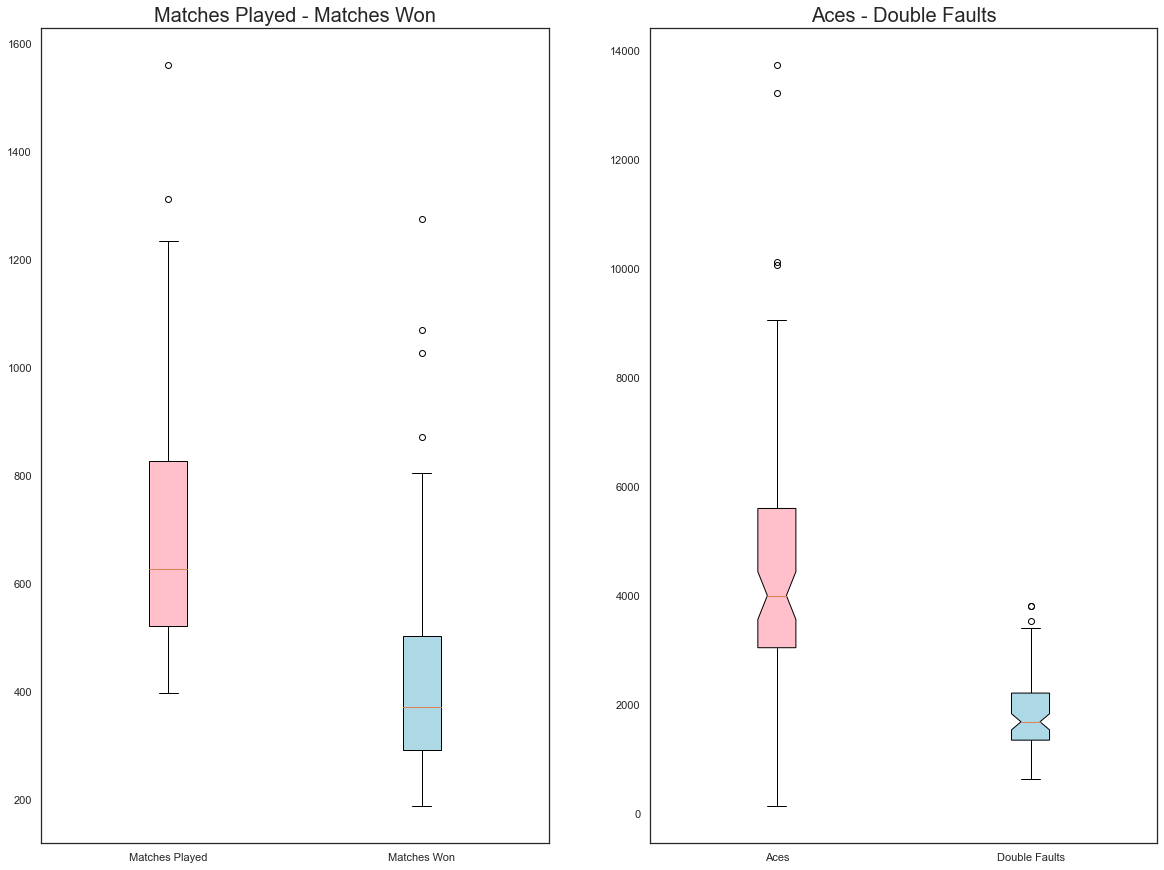

In [127]:
# Random test data
all_data = todos_1['Matches Played'],todos_1['Matches Won']
all_data_1 = todos_1['Aces'],todos_1['Double Faults']
labels = ['Matches Played','Matches Won']
labels_1 = ['Aces','Double Faults']


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Matches Played - Matches Won',fontsize=20)

# notch shape box plot
bplot2 = ax2.boxplot(all_data_1,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_1)  # will be used to label x-ticks
ax2.set_title('Aces - Double Faults',fontsize=20)

# fill with colors
colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

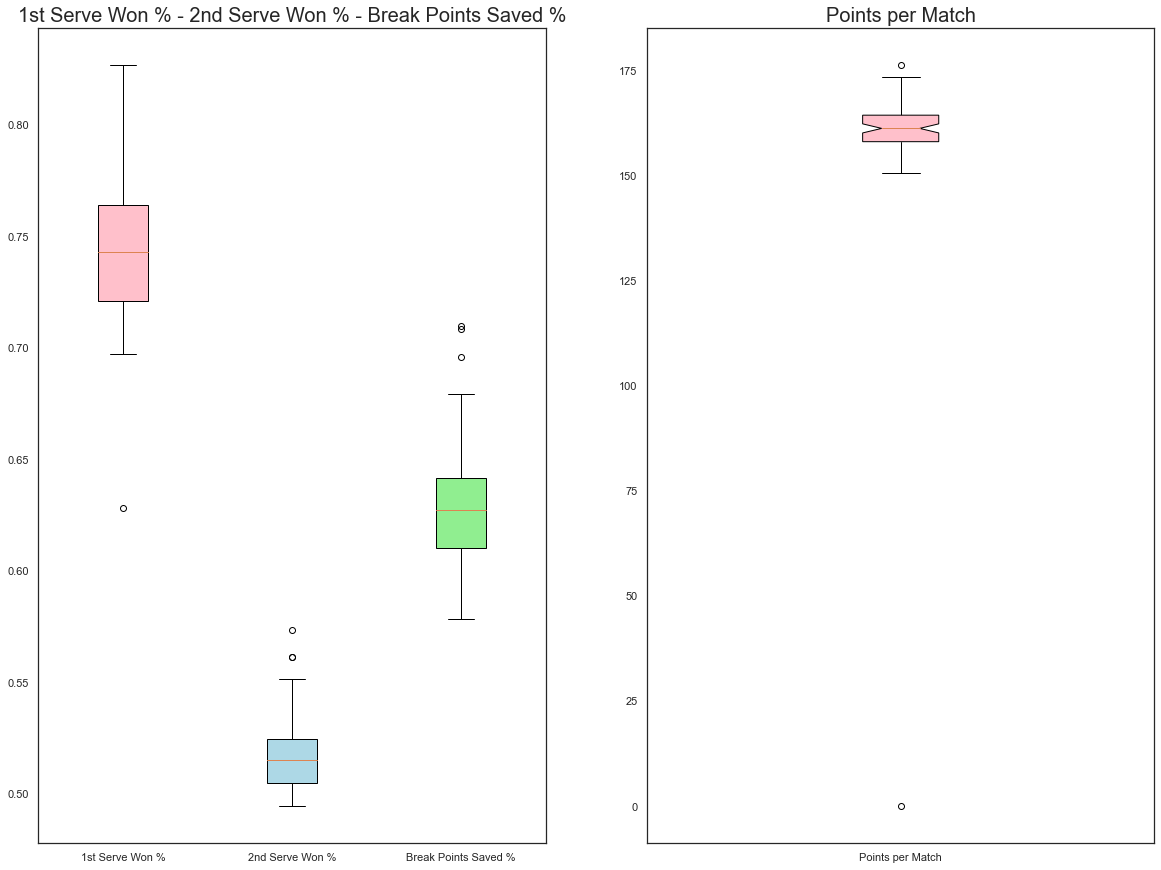

In [128]:

# Random test data
all_data = todos_1['1st Serve Won %'],todos_1['2nd Serve Won %'],todos_1['Break Points Saved %']
all_data_1 = todos_1['Points per Match']
labels = ['1st Serve Won %','2nd Serve Won %','Break Points Saved %']
labels_1 = ['Points per Match']


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('1st Serve Won % - 2nd Serve Won % - Break Points Saved %',fontsize=20)

# notch shape box plot
bplot2 = ax2.boxplot(all_data_1,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_1)  # will be used to label x-ticks
ax2.set_title('Points per Match',fontsize=20)

# fill with colors
colors = ['pink', 'lightblue','lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)